In [1]:
using Knet
# Test if Knet is using gpu
Knet.gpu()

using Pkg;

# Install missing packages
for p in ["Knet", "MLJ", "MLJModels", "Distributions", "Plots", "NPZ", "CSV"]
    if !haskey(Pkg.installed(),p)
        Pkg.add(p);
    end
end

using Knet, Plots, Random,  MLJ, Distributions, LinearAlgebra, NPZ, CSV
atype = (Knet.gpu()>=0 ? Knet.KnetArray{Float32} : Array{Float32})

include("model.jl")
include("loss.jl")
include("classify.jl")
include("data.jl")
include("train.jl")

┌ Warning: CuArrays.jl only supports CUDNN v7.6 or higher
└ @ CuArrays /kuacc/users/ssafadoust20/.julia/packages/CuArrays/A6GUx/src/CuArrays.jl:122


In [2]:
realnvp, prior, data, int_labels = train(in_dim=2, hidden_dim=512, num_coupling_layers=5, num_hidden_layers=1, k=256,
    lr=1e-4, steps=1, print_freq=500, batch_size="auto", dataset="circles", latent_mean_random=false);

iter 1 loss: T(18.87915) 


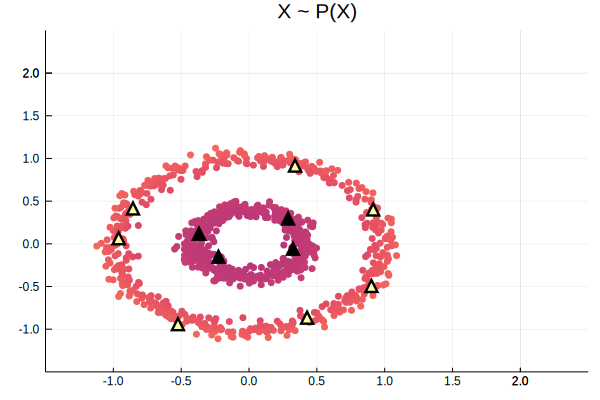

In [4]:
xs = convert(Array{Float32}, data[1,:])
ys = convert(Array{Float32}, data[2,:])
p3 = plot(xs, ys, title="X ~ P(X)", seriestype = :scatter, xlim=(-1.5, 2.5), ylim=(-1.5,2.5), m = :magma, zcolor = xs.^2+ys.^2, markerstrokewidth=0, legend=:none)
for i in 1:(maximum(int_labels)+1)
    m = [index[2] for index in findall(label->label==(i-1), int_labels)]
    xs = convert(Array{Float32}, data[1,m])
    ys = convert(Array{Float32}, data[2,m])
    plot!(xs, ys, seriestype = :scatter, markershape = :utriangle, zcolor=prior.means[1,i], markersize=6, markerstrokewidth=3)
end
p3

In [11]:
realnvp, prior, data, int_labels = train(in_dim=2, hidden_dim=512, num_coupling_layers=5, num_hidden_layers=1, k=256,
    lr=1e-4, steps=16001, print_freq=500, batch_size="auto", dataset="8gauss", latent_mean_random=false);

iter 1 loss: T(33.441048) 
iter 501 loss: T(8.897115) 
iter 1001 loss: T(8.920922) 
iter 1501 loss: T(8.672107) 
iter 2001 loss: T(8.546897) 
iter 2501 loss: T(8.637251) 
iter 3001 loss: T(8.5499525) 
iter 3501 loss: T(8.456408) 
iter 4001 loss: T(8.389272) 
iter 4501 loss: T(8.721553) 
iter 5001 loss: T(8.433744) 
iter 5501 loss: T(8.393801) 
iter 6001 loss: T(8.318327) 
iter 6501 loss: T(8.390393) 
iter 7001 loss: T(8.086313) 
iter 7501 loss: T(8.378179) 
iter 8001 loss: T(8.340062) 
iter 8501 loss: T(8.5786) 
iter 9001 loss: T(8.819975) 
iter 9501 loss: T(8.871228) 
iter 10001 loss: T(8.161127) 
iter 10501 loss: T(8.215217) 
iter 11001 loss: T(8.504706) 
iter 11501 loss: T(8.388019) 
iter 12001 loss: T(8.69838) 
iter 12501 loss: T(8.511488) 
iter 13001 loss: T(8.275944) 
iter 13501 loss: T(8.19515) 
iter 14001 loss: T(8.327498) 
iter 14501 loss: T(8.335979) 
iter 15001 loss: T(8.161057) 
iter 15501 loss: T(8.211973) 
iter 16001 loss: T(8.462301) 


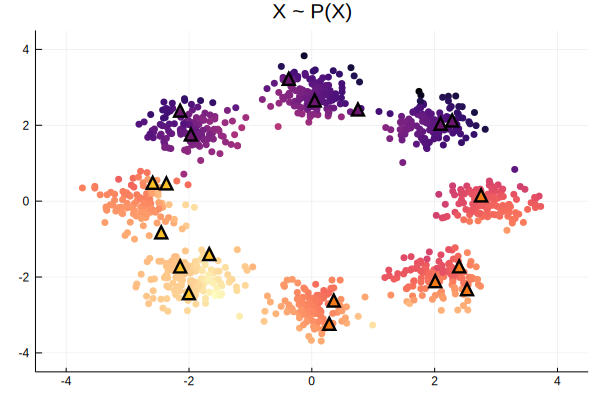

In [12]:
inv_ = realnvp(data)
xs = convert(Array{Float32}, data[1,:])
ys = convert(Array{Float32}, data[2,:])
p3 = plot(xs, ys, title="X ~ P(X)", seriestype = :scatter, xlim=(-4.5, 4.5), ylim=(-4.5,4.5), m = :magma, zcolor = convert(Array{Float32},inv_[1,:]+inv_[2,:]), markerstrokewidth=0, legend=:none)
for i in 1:(maximum(int_labels)+1)
    m = [index[2] for index in findall(label->label==(i-1), int_labels)]
    xs = convert(Array{Float32}, data[1,m])
    ys = convert(Array{Float32}, data[2,m])
    plot!(xs, ys, seriestype = :scatter, markershape = :utriangle, zcolor=prior.means[1,i]+prior.means[2,i], markersize=6, markerstrokewidth=3)
end
p3

In [13]:
realnvp, prior, data, int_labels = train(in_dim=2, hidden_dim=512, num_coupling_layers=5, num_hidden_layers=1, k=256,
    lr=1e-4, steps=16001, print_freq=500, batch_size="auto", dataset="pinwheel", latent_mean_random=false);

iter 1 loss: T(21.95188) 
iter 501 loss: T(7.8780766) 
iter 1001 loss: T(7.8783574) 
iter 1501 loss: T(7.923724) 
iter 2001 loss: T(7.362256) 
iter 2501 loss: T(7.411086) 
iter 3001 loss: T(7.416767) 
iter 3501 loss: T(7.365798) 
iter 4001 loss: T(7.5876274) 
iter 4501 loss: T(7.9307485) 
iter 5001 loss: T(7.7944417) 
iter 5501 loss: T(7.589528) 
iter 6001 loss: T(7.783215) 
iter 6501 loss: T(7.8410554) 
iter 7001 loss: T(6.9874673) 
iter 7501 loss: T(7.098589) 
iter 8001 loss: T(7.738623) 
iter 8501 loss: T(7.54514) 
iter 9001 loss: T(7.8764257) 
iter 9501 loss: T(7.8645897) 
iter 10001 loss: T(7.225158) 
iter 10501 loss: T(7.422955) 
iter 11001 loss: T(7.04307) 
iter 11501 loss: T(7.438826) 
iter 12001 loss: T(7.200695) 
iter 12501 loss: T(7.1520877) 
iter 13001 loss: T(7.414743) 
iter 13501 loss: T(7.674508) 
iter 14001 loss: T(7.5813503) 
iter 14501 loss: T(7.3893795) 
iter 15001 loss: T(7.470238) 
iter 15501 loss: T(7.05947) 
iter 16001 loss: T(7.2942014) 


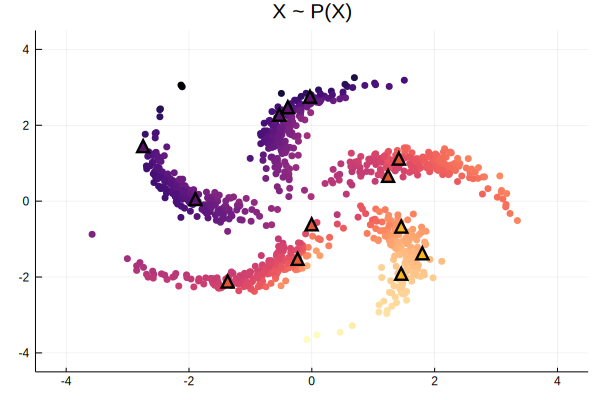

In [14]:
inv_ = realnvp(data)
xs = convert(Array{Float32}, data[1,:])
ys = convert(Array{Float32}, data[2,:])
p3 = plot(xs, ys, title="X ~ P(X)", seriestype = :scatter, xlim=(-4.5, 4.5), ylim=(-4.5,4.5), m = :magma, zcolor = convert(Array{Float32},inv_[1,:]), markerstrokewidth=0, legend=:none)
for i in 1:(maximum(int_labels)+1)
    m = [index[2] for index in findall(label->label==(i-1), int_labels)]
    xs = convert(Array{Float32}, data[1,m])
    ys = convert(Array{Float32}, data[2,m])
    plot!(xs, ys, seriestype = :scatter, markershape = :utriangle, zcolor=prior.means[1,i], markersize=6, markerstrokewidth=3)
end
p3